<a href="https://colab.research.google.com/github/wasu-rutuja/rutujaw/blob/main/apple__ip_29_april.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall opencv-python
!pip uninstall opencv-contrib-pythony

Found existing installation: opencv-python 4.1.2.30
Uninstalling opencv-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-python-4.1.2.30


In [ ]:
!pip install opencv-python==3.4.2.17
!pip install opencv-contrib-python==3.4.2.17

     |████████████████████████████████| 25.0 MB 9.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 30.6 MB 59 kB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


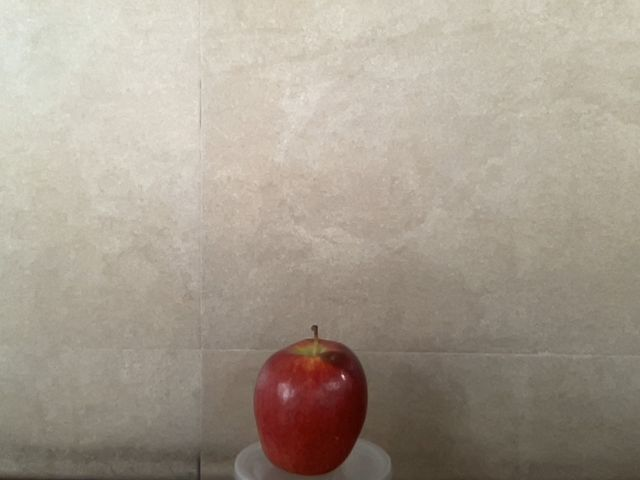

In [ ]:
from IPython.display import Image


try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))



In [ ]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab.patches import cv2_imshow
from PIL import Image, ImageEnhance

sample1=Image.open('photo.jpg')
sample1=ImageEnhance.Color(sample1)
sample1.enhance(2.0).show()
sample1.enhance(2.0).save('sample1.png')

<IPython.core.display.Javascript object>

Saved to photo.jpg


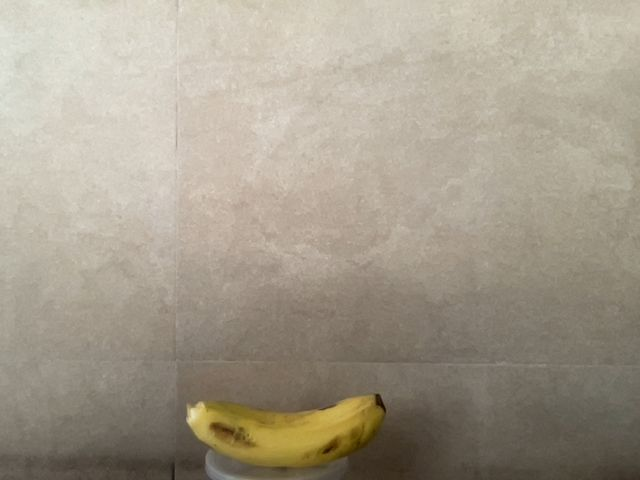

In [ ]:
from IPython.display import Image

try:
  filename = take_photo()

  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))



In [ ]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab.patches import cv2_imshow
from PIL import Image, ImageEnhance

sample2=Image.open('photo.jpg')
sample2=ImageEnhance.Color(sample2)
sample2.enhance(2.0).show()
sample2.enhance(2.0).save('sample2.png')



<IPython.core.display.Javascript object>

Saved to photo.jpg


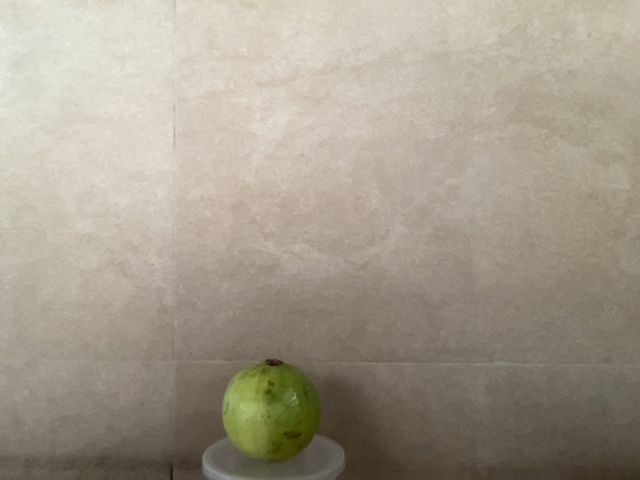

In [ ]:
from IPython.display import Image

try:
  filename = take_photo()

  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab.patches import cv2_imshow
from PIL import Image, ImageEnhance

sample3=Image.open('photo.jpg')
sample3=ImageEnhance.Color(sample3)
sample3.enhance(2.0).show()
sample3.enhance(2.0).save('sample3.png')

<IPython.core.display.Javascript object>

Saved to photo.jpg


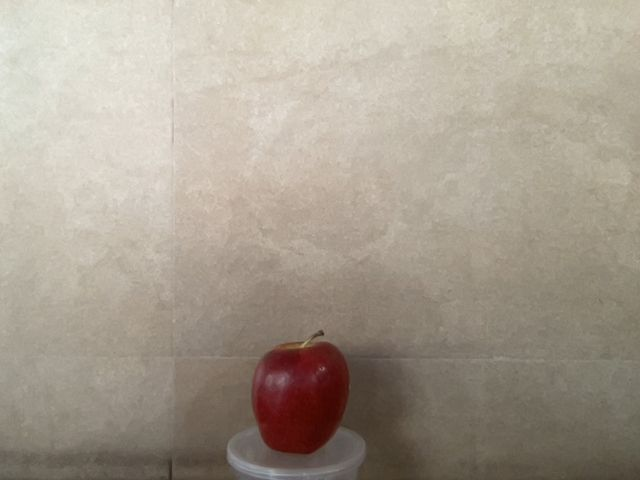

In [ ]:
from IPython.display import Image

try:
  filename = take_photo()

  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab.patches import cv2_imshow
from PIL import Image, ImageEnhance

img2=Image.open('photo.jpg')
img2=ImageEnhance.Color(img2)
img2.enhance(2.0).show()
img2.enhance(2.0).save('input.png')

In [ ]:

img1 = cv2.imread('sample1.png') 
img2 = cv2.imread('input.png') 
img3 = cv2.imread('sample2.png') 
img4 = cv2.imread('sample3.png')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)


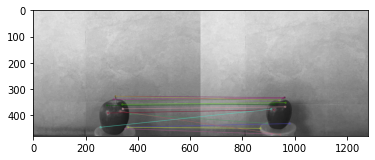

(<matplotlib.image.AxesImage at 0x7f67010b5210>, None)

In [ ]:

#sift
sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img5 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:100], img2, flags=2)
plt.imshow(img5),plt.show()

In [ ]:
print(len(matches))
val1=len(matches)

14


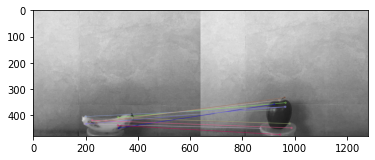

(<matplotlib.image.AxesImage at 0x7f6701015ed0>, None)

In [ ]:
#sift
sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img3,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img7 = cv2.drawMatches(img3, keypoints_1, img2, keypoints_2, matches[:100], img2, flags=2)
plt.imshow(img7),plt.show()

In [ ]:
print(len(matches))
val2=len(matches)

13


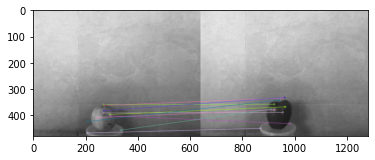

(<matplotlib.image.AxesImage at 0x7f6700f80ad0>, None)

In [ ]:
#sift
sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img4,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img8 = cv2.drawMatches(img4, keypoints_1, img2, keypoints_2, matches[:100], img2, flags=2)
plt.imshow(img8),plt.show()

In [ ]:
print(len(matches))
val3=len(matches)

10


In [ ]:
print("Macthes with sample 1=", val1)
print("Macthes with sample 2=", val2)
print("Macthes with sample 3=", val3)

Macthes with sample 1= 14
Macthes with sample 2= 13
Macthes with sample 3= 10


In [ ]:
if(val1>val2):
  if(val3>val1):
    max=val3
  else:
    max=val1
elif(val3>val2):
  max=val3
else:
  max=val2

print("Max matches is", max)



Max matches is 14


In [ ]:
if(max==val1):
  #Apple
  apple()

if(max==val2):
  #Banana
  banana()

if(max==val3):
  peru()



def apple():
  from __future__ import division
  import io
  import os
  import random
  import cv2
  import numpy as np
  import time
  from copy import deepcopy
  kernelOpen=np.ones((5,5))
  kernelClose=np.ones((20,20))  
  from PIL import Image, ImageEnhance
import cv2 
import numpy as np
import matplotlib.pyplot as plt

i=time.strftime("%d-%m-%y_%H-%M-%S")

# capture image
camera = cv2.VideoCapture(0)
return_value, image = camera.read()

smallest = np.amin(image)
biggest = np.amax(image)
contrastmat = (image - smallest)/(biggest - smallest) * 255; 
contrastImg = np.array(contrastmat, dtype = np.uint8)
cv2.imshow("CS image",contrastImg)
cv2.waitKey(5000) 
cv2.destroyAllWindows() 
cv2.imwrite(i+'.jpeg', contrastImg)

del(camera)
frame=contrastImg



edge_img=deepcopy(contrastImg)
# finds edges in the input image image and
# marks them in the output map edges
edged = cv2.Canny(edge_img,50,100)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)
 
# find contours in the edge map

cnts,h = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

max_contA=cv2.contourArea(cnts[0])
max_cont=max(cnts,key=cv2.contourArea)

for i in range(len(cnts)):
    	x,y,w,h=cv2.boundingRect(max_cont)
    	cv2.rectangle(edge_img,(x,y),(x+w,y+h),(0,0,255), 2)
croppedk=frame[y:y+h,x:x+w]

# Display the fruit 
cv2.imshow('Edges',edge_img)

frame=edge_img

# converting BGR to HSV
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

     
# define range of red color in HSV
lower_red = np.array([0,50,50])
upper_red = np.array([10,255,255])
     
# create a red HSV colour boundary and 
# threshold HSV image
redmask1 = cv2.inRange(hsv, lower_red, upper_red)
    
# define range of red color in HSV
lower_red = np.array([170,50,50])
upper_red = np.array([180,255,255])
     
    
# create a red HSV colour boundary and 
# threshold HSV image
redmask2 = cv2.inRange(hsv, lower_red, upper_red)
 
redmask=redmask1+redmask2
maskOpen=cv2.morphologyEx(redmask,cv2.MORPH_OPEN,kernelOpen)
maskClose=cv2.morphologyEx(maskOpen,cv2.MORPH_CLOSE,kernelClose)

maskFinal=maskClose
cv2.imshow('Red_Mask:',maskFinal)


cnt_r=0
for r in redmask:
	cnt_r=cnt_r+list(r).count(255)
cv2.waitKey(5000)
cv2.destroyAllWindows()
print ("Redness ",cnt_r)

lower_green=np.array([50,50,50])
upper_green=np.array([70,255,255])
greenmask = cv2.inRange(hsv, lower_green, upper_green)
cv2.imshow('Green_Mask:',greenmask)
cnt_g=0
for g in greenmask:
	cnt_g=cnt_g+list(g).count(255)
print ("Greenness ",cnt_g)
cv2.waitKey(5000)
cv2.destroyAllWindows()

lower_yellow=np.array([20,50,50])
upper_yellow=np.array([30,255,255])
yellowmask = cv2.inRange(hsv, lower_yellow, upper_yellow)
cv2.imshow('Yellow_Mask:',yellowmask)
cnt_y=0
for y in yellowmask:
	cnt_y=cnt_y+list(y).count(255)
print ("Yellowness ",cnt_y)
cv2.waitKey(5000)
cv2.destroyAllWindows()

lower_yellow=np.array([20,50,50])
upper_yellow=np.array([30,255,255])
yellowmask = cv2.inRange(hsv, lower_yellow, upper_yellow)
cv2.imshow('Yellow_Mask:',yellowmask)
cnt_y=0
for y in yellowmask:
	cnt_y=cnt_y+list(y).count(255)
print ("Yellowness ",cnt_y)
cv2.waitKey(5000)
cv2.destroyAllWindows()
tot_area=cnt_r+cnt_y+cnt_g
rperc=cnt_r/tot_area
yperc=cnt_y/tot_area
gperc=cnt_g/tot_area


#Adjust the limits for your fruit
glimit=0.5
ylimit=0.4

if gperc>glimit:
    print ("Low Ripeness")
elif yperc>ylimit:
    print ("High Ripeness")
else:
    print ("Medium Ripeness")
